In [1]:
import numpy as np
from numpy.linalg import inv
from matplotlib import pyplot as plt
import pandas as pd

address = 'D:/HomeWork/Machine Learning/ML-HW01/ML-HW01/dataset1/dataset1.csv'
df = pd.read_csv(address)
data = df.sample(frac=1)

In [2]:
#create new data for multivariate gradient descent
data['x0']=data['x']**0
data['x2']=data['x']**2
data['x3']=data['x']**3
data['x4']=data['x']**4
data['x5']=data['x']**5

#change columns for better access
newY = data.pop('y')
x0 = data.pop('x0')

data.insert(0, 'y', newY)
data.insert(1, 'x0', x0)

#insert data in arrays
y = data.iloc[:, 0].values
X = data.iloc[:, 1:7].values

mainX = data.iloc[:,2].values

data.head(5)

,y,x0,x,x2,x3,x4,x5
169,0.976418,1.0,-0.656741,0.431308,-0.283258,0.186027,-0.122171
276,0.184975,1.0,0.882755,0.779257,0.687893,0.607242,0.536046
153,1.400229,1.0,0.231119,0.053416,0.012345,0.002853,0.000659
162,1.355131,1.0,0.444111,0.197235,0.087594,0.038902,0.017277
251,-0.611781,1.0,0.880864,0.775921,0.683481,0.602054,0.530327


In [3]:
def cost_function_MSE(X, Y, theta):
    m = len(Y)
    J = np.sum((X.dot(theta)-Y) ** 2)/(2 * m)
    return J

In [4]:
def normal_equation(X, Y):
    m = len(Y)
    
    XtX =np.dot(X.T,X)
    XX = inv(XtX)
    
    XtY = np.dot(X.T , Y)
    
    theta = np.dot(XX , XtY)
    
 # New Cost Value
    cost = cost_function_MSE(X, Y, Theta)
 
    return theta , cost

In [5]:
#60% of data for train
#40% of data for test
m = 180

X_train = X[:m]
mainX_train = X[:m , 1]
y_train = y[:m]

X_test = X[m: , 1]
y_test = y[m:]

In [6]:
# Initial Coefficients
Theta = np.zeros(X_train.shape[1])

newTheta, cost_history = normal_equation(X_train, y_train)

# print(newTheta)

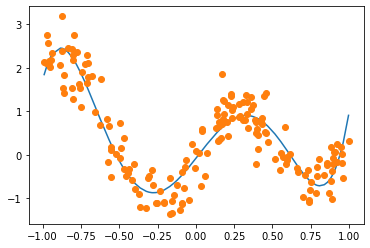

In [7]:
# plot
sorted_X_train = np.sort(mainX_train)
y_predict = [None] * len(sorted_X_train)

for i in range(len(sorted_X_train)):
    y_predict[i] = newTheta[0]+ newTheta[1]*sorted_X_train[i] + newTheta[2]*(sorted_X_train[i]**2) + newTheta[3]*(sorted_X_train[i]**3) + newTheta[4]*(sorted_X_train[i]**4) + newTheta[5]*(sorted_X_train[i]**5)


plt.plot(sorted_X_train,y_predict)
plt.plot(mainX_train,y_train , linestyle='', marker='o')

plt.show()

In [8]:
#test
def pred(testData , Thetas):
    y_predict = [None] * len(testData)
    for i in range(len(testData)):
        y_predict[i] = Thetas[0]+ Thetas[1]*testData[i] + Thetas[2]*(testData[i]**2) + Thetas[3]*(testData[i]**3) + Thetas[4]*(testData[i]**4) + Thetas[5]*(testData[i]**5)
    
    return (y_predict)

In [9]:
def r2(y_,y):
    sst = np.sum((y-y.mean())**2)
    ssr = np.sum((y_-y)**2)
    r2 = 1-(ssr/sst)
    return(r2)

In [10]:
y_ = pred(X_test,newTheta)

In [11]:
r2(y_,y_test)

0.777662675794176